<a href="https://colab.research.google.com/github/r3214/Machine-Learning-Dicoding/blob/main/Submission_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import sklearn
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os, shutil, zipfile

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-10-14 12:27:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.66MB/s    in 63s     

2020-10-14 12:28:31 (4.92 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Split DataSet

In [4]:
#make directory for train and val
base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [5]:
#Link directory rock, paper, scissors
roc_dir = os.path.join(base_dir, 'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [6]:
#make directory for rock, paper, scrissors in train_dir and validation_dir
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [7]:
#Split Data for Train and Validation
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

for i in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, i), os.path.join(train_roc, i))
for i in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,i), os.path.join(train_pap,i))
for i in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,i), os.path.join(train_sci,i))

for i in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, i), os.path.join(val_roc,i))
for i in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,i), os.path.join(val_pap,i))
for i in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,i), os.path.join(val_sci,i))

Augmentation Image

In [8]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    shear_range=0.2,
                    width_shift_range=0.15,
                    height_shift_range=0.15,
                    horizontal_flip=True,
                    vertical_flip=True,
                    zoom_range=0.5,
                    fill_mode = 'nearest'
                    )

train_generator = train_datagen.flow_from_directory(
    batch_size=32,
    directory=train_dir,
    shuffle=True,
    target_size=(150,150),
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.


In [9]:
val_datagen = ImageDataGenerator(rescale=1./255
                                 )

val_generator = val_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size= 32,
    class_mode='categorical'
    )

Found 876 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='sigmoid')
                                    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAccuracy more than 96%, stop training!")
      self.model.stop_training = True

callbacks = myCallback()

In [13]:
import numpy as np
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(32))),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=int(np.ceil(val_generator.n / float(32))),
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 72s - loss: 1.0584 - accuracy: 0.4085 - val_loss: 0.8900 - val_accuracy: 0.5925
Epoch 2/20
41/41 - 72s - loss: 0.8524 - accuracy: 0.6113 - val_loss: 0.4661 - val_accuracy: 0.7888
Epoch 3/20
41/41 - 72s - loss: 0.5692 - accuracy: 0.7744 - val_loss: 0.1831 - val_accuracy: 0.9612
Epoch 4/20
41/41 - 71s - loss: 0.3740 - accuracy: 0.8674 - val_loss: 0.1146 - val_accuracy: 0.9783
Epoch 5/20
41/41 - 71s - loss: 0.2949 - accuracy: 0.9017 - val_loss: 0.2685 - val_accuracy: 0.8973
Epoch 6/20
41/41 - 71s - loss: 0.2609 - accuracy: 0.9230 - val_loss: 0.0877 - val_accuracy: 0.9772
Epoch 7/20
41/41 - 71s - loss: 0.2172 - accuracy: 0.9245 - val_loss: 0.2956 - val_accuracy: 0.8881
Epoch 8/20
41/41 - 71s - loss: 0.2592 - accuracy: 0.9131 - val_loss: 0.0927 - val_accuracy: 0.9715
Epoch 9/20
41/41 - 71s - loss: 0.1723 - accuracy: 0.9474 - val_loss: 0.0852 - val_accuracy: 0.9737
Epoch 10/20
41/41 - 71s - loss: 0.2056 - accuracy: 0.9306 - val_loss: 0.1489 - val_accuracy: 0.9612
Epoch 11/

In [18]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

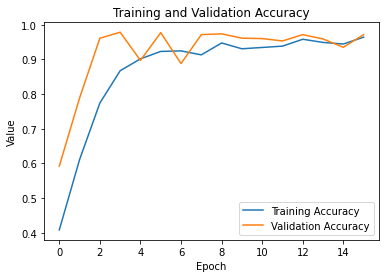

In [20]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.show()

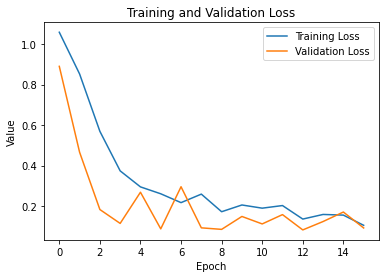

In [19]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()